![image.png](attachment:56bba98f-c30c-4d37-90cf-fb5fc0153ad1.png)

# **Computational Immunomics 2023**

Interfakultäres Institut für Biomedizinische Informatik (IBMI)

Prof. Dr. Oliver Kohlbacher

Tutors:
Alexander Röhl, Matteo Pilz

ci-ss23@informatik.uni-tuebingen.de

# **INFORMATION**

You should work in groups of 3 to 4 on the project, please write your names here:
1. \<name_1\>
2. \<name_2\>
3. \<name_3\>
4. \<name_4\>

You are allowed to write in german or english.
Your hand in should be zipped and the archive should follow the naming convention:
project_\<name_1\>_\<name_2\>_\<name_3\>_\<name_4\>.zip\
Example: project_weber_mueller_muster_sommer.zip

Finally, upload your zip file containing all important files to ILIAS.

Tip: You can use some LaTex commands (rendered with MathJax) in math mode: $\alpha$

# **Project (100P + 5BP) - Hand In: Thursday July 20, 11:55 pm**

This project applies the practical knowledge you gained on machine learning during the lecture and the assignments of this course.
Your task is to implement a MHC I-binding predictor with a prediction as accurate as possible. You may thereby use any method, model, or strategy, which you implemented using any python library.
However, you are not allowed to simply load in and use an existing predictor. Copying the code from one is also not allowed and will, without citation, be counted as plagiarism. You are free to **adopt** existing implementations (please cite accordingly) and orientate yourself on published models regarding structure and parameters.

Feel free to also make use of the following potential work plan.

## <h2><center>Dates \& Potential Work Plan</center></h2>

| **Date**         | **Task**                                                                                                          |
|------------------|-------------------------------------------------------------------------------------------------------------------|
| June 13 - Week 1 | **Project handout**, research / familiarize yourself with the Python libraries                                    |
| June 20          | **[Group assignment](#group_assignment) 11:55 pm**, Assign yourself to one of the groups in ILIAS                 |
| June 22 - Week 2 | Choose an appropriate [encoding](#encoding)                                                                       |
| June 29 - Week 3 | Create [model](#model) drafts                                                                                     |
| July 06 - Week 4 | [Optimize](#optimization) your model by using a cross-validation pipeline                                         |
| July 13 - Week 5 | Finish the [optimization](#optimization), write the [prediction output](#output) function & write-up your project |
| July 20 - Week 6 | **Project handin 11:55 pm**, prepare presentation                                                                 |
| July 27          | **[Project presentation](#presentation)**                                                                         |
| August 03        | **Written exam**                                                                                                  |

<a id='group_assignment'></a>

## **Group Assignment - Tuesday June 20, 11:55 pm**
Assign yourself to one of the groups in the Computational Immunomics workspace in ILIAS under */Exercises/Project*. Make sure you and the rest of your group assign yourself to the same group. Joining and leaving a group in ILIAS is possible until Tuesday June 20 11:55 pm.

---
## **1. Input**
You are given a dataset with labeled datapoints as training data in `ci_project_data.csv`. The dataset contains four columns: `sequence`, `label`, `length` and `affinity`. The labels are `0 == non binder` and `1 == binder` (classification), the `affinity` is the binding affinity from 0-1, which you may use as an alternative (regression). Use this data wisely in order to fulfill the requirements of the project. At the end, make sure that your selected model is trained on the full dataset \*, before you use it for prediction.

### **Bonus (5BP)**
\* The dataset does not only contain peptides with length 9, but also shorter and longer ones. Find a suitable way to encode these peptides (in [2. Encoding](#encoding)) and use them in your training, too. If you don't want to do this task, you can simply filter out all peptides that do not have length 9 (the remaining number of sequences should be 7176).

In [1]:

!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV



In [19]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

In [2]:
#project_data = pd.read_csv('ci_project_train.csv')
train_data = pd.read_csv('ci_project_train.csv')
test_sample = pd.read_csv('ci_project_test_sample.csv')

train_data

def adjust_sequence_length(seq, desired_length=9):
    if len(seq) == desired_length:
        return seq
    elif len(seq) < desired_length:
        # Padding
        return seq + 'X'*(desired_length - len(seq))
    else:
        # Trimming
        excess = len(seq) - desired_length
        left_trim = excess // 2
        right_trim = excess - left_trim
        return seq[left_trim:-right_trim]

# Adjust the sequence lengths in the training data
train_data['sequence'] = train_data['sequence'].apply(adjust_sequence_length)

# Check the first few rows of the data
train_data.head()


,sequence,label,length,affinity
0,SVFNSLYAX,0,8,0.419718
1,YLIRALTLX,0,8,0.407692
2,FLTGYLQLX,0,8,0.401746
3,ALQLLLEVX,0,8,0.399727
4,VLFQNWGIX,0,8,0.376714


<a id='encoding'></a>

---
## **2. Encoding**
Explain how you encode your data, so that the model is able to return meaningful predictions. If you use an encoding from an existing source, which we encourage, make sure to properly cite it. We also encourage you to prepare multiple different encodings and compare their results later.

...

In [3]:
# Create a LabelEncoder
label_encoder = LabelEncoder()


amino_acids = set(''.join(train_data['sequence']))
label_encoder.fit(list(amino_acids))


integer_encoded_sequences = train_data['sequence'].apply(list).apply(label_encoder.transform)


integer_encoded_sequences.head()


np.random.seed(42)
random_encoding = {aa: np.random.rand() for aa in amino_acids}


random_encoded_sequences = train_data['sequence'].apply(list).apply(lambda seq: [random_encoding[aa] for aa in seq])


random_encoded_sequences.head()

0    [0.9507143064099162, 0.7319939418114051, 0.291...
1    [0.21233911067827616, 0.5247564316322378, 0.86...
2    [0.2912291401980419, 0.5247564316322378, 0.183...
3    [0.3042422429595377, 0.5247564316322378, 0.181...
4    [0.7319939418114051, 0.5247564316322378, 0.291...
Name: sequence, dtype: object

<a id='model'></a>

---
## **3. Machine Learning Model**
Select at least one machine learning algorithm, which you'd like to apply your following tests on. Explain why you chose those algorithms. Note: It may be beneficial to set up multiple different models and test their performance for your task, even if you end up using only one at the end.

...

In [4]:
#SVM

class_0 = train_data[train_data['label'] == 0].sample(500)
class_1 = train_data[train_data['label'] == 1].sample(500)
balanced_data = pd.concat([class_0, class_1])


integer_encoded_sequences_balanced = balanced_data['sequence'].apply(list).apply(label_encoder.transform)


X_integer_encoded_balanced = np.array(integer_encoded_sequences_balanced.to_list())


X_train, X_val, y_train, y_val = train_test_split(X_integer_encoded_balanced, balanced_data['label'], test_size=0.2, stratify=balanced_data['label'], random_state=42)

# Initialize the SVM
clf = svm.SVC()

# Train the SVM
clf.fit(X_train, y_train)


y_pred = clf.predict(X_val)


print(classification_report(y_val, y_pred))



              precision    recall  f1-score   support

           0       0.64      0.63      0.63       100
           1       0.63      0.64      0.64       100

    accuracy                           0.64       200
   macro avg       0.64      0.64      0.63       200
weighted avg       0.64      0.64      0.63       200



In [5]:
#ANN


model = Sequential()
model.add(Dense(64, input_dim=9, activation='relu'))  # Input layer
model.add(Dense(1, activation='sigmoid'))  # Output layer


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, verbose=1)


_, accuracy = model.evaluate(X_val, y_val, verbose=1)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/10
25/25 [==============================] - 1s 1ms/step - loss: 0.9811 - accuracy: 0.5150
Epoch 2/10
25/25 [==============================] - 0s 1ms/step - loss: 0.7955 - accuracy: 0.5263
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: 0.7324 - accuracy: 0.5375
Epoch 4/10
25/25 [==============================] - 0s 1ms/step - loss: 0.7235 - accuracy: 0.5700
Epoch 5/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5775
Epoch 6/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.5625
Epoch 7/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6771 - accuracy: 0.5825
Epoch 8/10
25/25 [==============================] - 0s 990us/step - loss: 0.6710 - accuracy: 0.5888
Epoch 9/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6588 - accuracy: 0.6087
Epoch 10/10
7/7 [==============================] - 0s 1ms/step - loss: 0.7161 - accuracy: 0.5150
Accuracy: 51.50


In [6]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)


rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_val)


print("Random Forest Classifier performance:")
print(classification_report(y_val, y_pred_rf))

Random Forest Classifier performance:
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       100
           1       0.77      0.78      0.78       100

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.78      0.78      0.77       200



In [7]:
# Initialize the Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)


gb.fit(X_train, y_train)


y_pred_gb = gb.predict(X_val)


print("Gradient Boosting Classifier performance:")
print(classification_report(y_val, y_pred_gb))


Gradient Boosting Classifier performance:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       100
           1       0.77      0.82      0.79       100

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.79      0.78       200



In [8]:
# Initialize the Logistic Regression model
lr = LogisticRegression(random_state=42)


lr.fit(X_train, y_train)


y_pred_lr = lr.predict(X_val)


print("Logistic Regression performance:")
print(classification_report(y_val, y_pred_lr))

Logistic Regression performance:
              precision    recall  f1-score   support

           0       0.55      0.58      0.57       100
           1       0.56      0.53      0.54       100

    accuracy                           0.56       200
   macro avg       0.56      0.55      0.55       200
weighted avg       0.56      0.56      0.55       200



In [9]:
# Initialize the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)


knn.fit(X_train, y_train)


y_pred_knn = knn.predict(X_val)


print("K-Nearest Neighbors Classifier performance:")
print(classification_report(y_val, y_pred_knn))

K-Nearest Neighbors Classifier performance:
              precision    recall  f1-score   support

           0       0.61      0.59      0.60       100
           1       0.61      0.63      0.62       100

    accuracy                           0.61       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.61      0.61      0.61       200



<a id='optimization'></a>

---
## **4. Optimization & Validation**
Write a cross-validation pipeline, with suitable metrics to test the performance of your model. Then integrate the optimization of the parameters for your model(s). Explain why you decided to tune these hyperparameters with their specific values. For example: We learned in detail how specifying certain parameters in SVMs impact their training process, such as their kernel function or the value of the parameter $C$.

...

In [10]:
# Define the parameter grid
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Initialize the GridSearchCV
grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, refit=True, verbose=2, cv=3)


grid_gb.fit(X_train, y_train)


print("Best parameters found by grid search:")
print(grid_gb.best_params_)



Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_es

In [11]:
#Now, let's use these parameters to train a Gradient Boosting Classifier and evaluate its performance on the validation set.


gb_best = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42)


gb_best.fit(X_train, y_train)


y_pred_gb_best = gb_best.predict(X_val)


print("Gradient Boosting Classifier performance with best parameters:")
print(classification_report(y_val, y_pred_gb_best))

Gradient Boosting Classifier performance with best parameters:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       100
           1       0.74      0.81      0.77       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



In [12]:
# using RandomizedSearchCV

# Define the parameter grid
param_distributions_gb = {
    'n_estimators': [100, 200, 300, 500, 700],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9, 11]
}


random_gb = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), param_distributions_gb, n_iter=10, cv=3, random_state=42)


random_gb.fit(X_train, y_train)


print("Best parameters found by randomized search:")
print(random_gb.best_params_)

Best parameters found by randomized search:
{'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2}


In [13]:
# Initialize the Gradient Boosting Classifier with the best parameters
gb_best = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=3, random_state=42)


gb_best.fit(X_train, y_train)


y_pred_gb_best = gb_best.predict(X_val)


print("Gradient Boosting Classifier performance with best parameters:")
print(classification_report(y_val, y_pred_gb_best))



Gradient Boosting Classifier performance with best parameters:
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       100
           1       0.72      0.79      0.76       100

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200



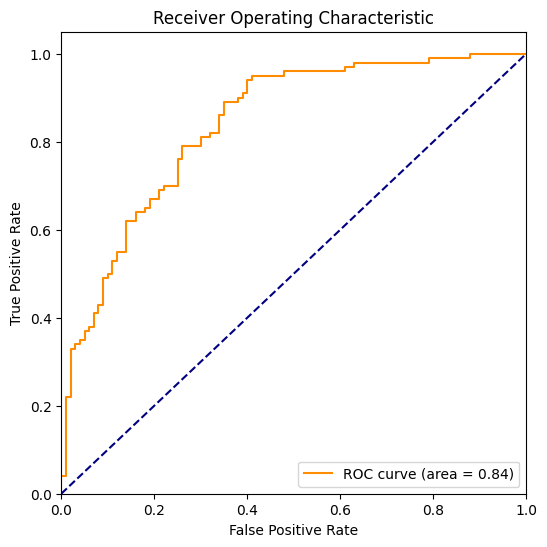

In [20]:

y_prob_gb_best = gb_best.predict_proba(X_val)[:, 1]


fpr, tpr, _ = roc_curve(y_val, y_prob_gb_best)


roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

<a id='output'></a>

---
## **5. Output**
The `predict` function below should contain a pipeline from a numpy array input of peptide sequences (`np.array` of `str`) to an `np.array` of predicted labels of `0` or `1`. In case you have been using `affinity` instead, make sure to set a suitable threshold for your prediction (output should be `0` or `1`). Therefore, the function should use your encoding, feed it into your model and output its result. You can test your function with the `test_sequences` below. The performance of your model will have a slight impact on your grading of your project as well (tested with a separate dataset). We will also release a ranking of all groups and their placement against each other.

**NOTE:** Before the call of the `predict` function, your model should have been trained already. Please do not include the training of the model in it.

In [22]:
def predict_peptide_binding(peptide_sequences, model, label_encoder):

    adjusted_sequences = np.array([adjust_sequence_length(seq) for seq in peptide_sequences])


    integer_encoded_sequences = [label_encoder.transform(list(seq)) for seq in adjusted_sequences]


    X = np.array(integer_encoded_sequences)

    predictions = model.predict(X)

    return predictions



In [23]:
test_sequences = np.array(["ACDEFGHIK", "KLMNPQRST", "VVVVVVVVV"])
predictions = predict_peptide_binding(test_sequences, gb_best, label_encoder)
print(predictions)

[0 1 0]


In [25]:
# Load the second csv file
test_data = pd.read_csv('ci_project_test_sample.csv')

test_sequences = test_data['sequence'].values
predictions = predict_peptide_binding(test_sequences, gb_best, label_encoder)

predictions

array([0, 1, 0, 0, 0, 0])

In [ ]:
#def predict(classifier: object, sequences: np.array) -> np.array:
    '''
    Predicts the binder label for a numpy array of sequences (0 for non-binder, 1 for binder).

            Parameters:
                    classifier (object): your classifier
                    sequences (np.array): Sequences array

            Returns:
                    A numpy array containing the binary decisions of all sequences
    '''

    #return np.random.randint(0, 2, len(sequences))  # TODO: replace this with your model's prediction


#help(predict)
#predict(object, test_sequences)

Help on function predict in module __main__:

predict(classifier: object, sequences: <built-in function array>) -> <built-in function array>
    Predicts the binder label for a numpy array of sequences (0 for non-binder, 1 for binder).
    
            Parameters:
                    classifier (object): your classifier
                    sequences (np.array): Sequences array
    
            Returns:
                    A numpy array containing the binary decisions of all sequences



array([1, 0, 1, 0, 1, 1])

<a id='presentation'></a>

---
---
# **7. Presentation - Thursday the 27th of July**
After handing in your project, you have one week to prepare a short 7-10min presentation (we'll have to stop you at 10 minutes). The presentations will be held by all groups on Thursday the 27th of July during the lecture.